In [1]:
#535230080_Georgia Sugisandhea
#Mengimport library library yang akan kita gunakan dan memasangkan nama variable untuk memudahkan penggunaan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
#Membaca tabel file excel yang ada di folder yang sama dan sesuai namanya yang kita masukkan, dan yang berada di sheet 1, memasukkannya ke variable ispu
ispu = pd.read_excel("ISPU Jakarta.xlsx", sheet_name="Sheet1")

In [3]:
#Menampilkan jumlah baris dalam tabel
print('Jumlah sampel = ', ispu.shape[0])
#Menampilkan jumlah kolom dalam tabel
print('Jumlah variabel (kolom) = ', ispu.shape[1])


Jumlah sampel =  1806
Jumlah variabel (kolom) =  7


In [4]:
#Menampilkam nama nama kolom

nama_kolom = ispu.columns
nama_kolom

#PM10 = Particulate Matter partikel udara yang berukuran lebih kecil dari 10 mikron
# PM25 = Particulate Matter partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer)
# SO2 = sulfur dioksida, merupakan salah satu spesies dari gas-gas oksida sulfur
# CO = karbon monoksida
# O3 = ozon
# NO2 = nitrogen dioksida

Index(['Tanggal', 'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2'], dtype='object')

In [5]:
#Mencetak 5 baris pertama dari tabel
ispu.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
0,2018-01-01,76.0,NaN,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,NaN,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,NaN,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,NaN,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,NaN,32.0,26.0,28.0,10.0


In [6]:
#Mencetak 5 baris terakhir dari tabel
ispu.tail()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
1801,2022-12-27,36.0,47.0,58.0,42.0,20.0,18.0
1802,2022-12-28,46.0,66.0,57.0,41.0,15.0,19.0
1803,2022-12-29,23.0,50.0,57.0,12.0,16.0,15.0
1804,2022-12-30,40.0,64.0,57.0,21.0,17.0,24.0
1805,2022-12-31,54.0,73.0,56.0,24.0,23.0,24.0


In [7]:
#Menampilkan deskripsi jumlah, rata rata, maksimum, minimum, standar deviasi, nilai quarter 1 2 dan 3 (25%, 50%, 75%)
D = ispu.describe()
D

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
count,1806,1800.000000,724.000000,1790.000000,1800.000000,1804.000000,1801.000000
mean,2020-07-05 23:30:29.900332032,59.593333,81.099448,34.008380,20.266111,75.283814,20.099389
min,2018-01-01 00:00:00,19.000000,20.000000,9.000000,0.000000,7.000000,3.000000
25%,2019-03-28 06:00:00,51.000000,65.000000,25.000000,14.000000,33.750000,13.000000
50%,2020-07-11 12:00:00,60.000000,79.000000,30.000000,18.000000,67.500000,18.000000
75%,2021-10-05 18:00:00,70.000000,95.000000,44.000000,24.000000,102.000000,26.000000
max,2022-12-31 00:00:00,134.000000,165.000000,72.000000,88.000000,243.000000,52.000000
std,NaN,15.170777,24.646066,11.627603,9.874857,49.407419,9.528997


In [8]:
#Menampilkan baris dimana ketika PM10 mencapai nilai tertinggi yaitu 134
ispu[ispu['PM10']==134]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
618,2019-10-01,134.0,NaN,33.0,20.0,184.0,16.0


In [9]:
#Menampilkan baris dimana ketika PM25 mencapai nilai tertinggi yaitu 165
ispu[ispu['PM25']==165]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
1445,2022-01-05,95.0,165.0,53.0,18.0,55.0,32.0


In [10]:
#Menampilkan baris dimana ketika SO2 mencapai nilai tertinggi yaitu 72
ispu[ispu['SO2']==72]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
13,2018-01-14,33.0,NaN,72.0,17.0,73.0,14.0
14,2018-01-15,30.0,NaN,72.0,19.0,70.0,12.0


In [11]:
#Menampilkan baris dimana ketika CO mencapai nilai tertinggi yaitu 88
ispu[ispu['CO']==88]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
39,2018-02-09,53.0,NaN,24.0,88.0,65.0,14.0
53,2018-02-23,64.0,NaN,26.0,88.0,61.0,14.0


In [12]:
#Menampilkan baris dimana ketika O3 mencapai nilai tertinggi yaitu 243
ispu[ispu['O3']==243]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
461,2019-04-07,72.0,NaN,21.0,41.0,243.0,13.0


In [13]:
#Menampilkan baris dimana ketika NO2 mencapai nilai tertinggi yaitu 52
ispu[ispu['NO2']==52]

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
1510,2022-03-11,77.0,107.0,46.0,23.0,52.0,52.0


In [14]:
#Mencetak nilai tertinggi pada SO2 dan kapan terjadinya
var = 'SO2'
var_max = D.loc['max'][var]
print(var + ' mencapai nilai tertinggi sebesar', var_max, 'pada tanggal', ispu[ispu[var]==var_max]['Tanggal'].values[0])

SO2 mencapai nilai tertinggi sebesar 72.0 pada tanggal 2018-01-14T00:00:00.000000000


In [15]:
#Mengambil data data yang berupa numeric saja
d = ispu.select_dtypes(include=[np.number])

In [16]:
#Menemukan dan mencetak polutan (kolom) yang memiliki rata rata tertinggi, yaitu PM25
D = d.describe()
max_val = D.loc['mean',:]
print('Polutan yang memiliki nilai rata-rata tertinggi adalah', max_val.idxmax(), 'sebesar ', max_val.max())

Polutan yang memiliki nilai rata-rata tertinggi adalah PM25 sebesar  81.09944751381215


In [17]:
#Menemukan dan mencetak polutan (kolom) yang memiliki rata rata terendah, yaitu NO2
D = d.describe()
min_val = D.loc['mean',:]
print('Polutan yang memiliki nilai rata rata terendah adalah ', min_val.idxmin(), ' sebesar ', min_val.min())

Polutan yang memiliki nilai rata rata terendah adalah  NO2  sebesar  20.09938922820655


In [18]:
#Menemukan dan mencetak polutan (kolom) yang memiliki nilai tertinggi, yaitu O3
D = d.describe()
max_val = D.loc['max',:]
print('Polutan yang memiliki nilai paling tinggi adalah ', max_val.idxmax(), ' sebesar ', max_val.max())

Polutan yang memiliki nilai paling tinggi adalah  O3  sebesar  243.0


In [19]:
#Menemukan dan mencetak polutan (kolom) yang memiliki nilai terendah, yaitu CO
D = d.describe()
min_val = D.loc['min',:]
print('Polutan yang memiliki nilai paling rendah adalah ', min_val.idxmin(), 'sebesar', min_val.min())

Polutan yang memiliki nilai paling rendah adalah  CO sebesar 0.0


In [20]:
#mencetak jumlah baris yang kosong pada masing masing kolom dalam tabel
ispu.isna().sum()

Tanggal       0
PM10          6
PM25       1082
SO2          16
CO            6
O3            2
NO2           5
dtype: int64

In [21]:
#mencetak persenan baris yang kosong dari masing masing kolom yang ada
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [22]:
#Karena PM25 kosongnya 59.9%, maka menghapus kolom PM25 dari seluruh tabel dan mencetak 5 baris pertamanya lagi
ispu2 = ispu.drop(['PM25'], axis=1)
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2
0,2018-01-01,76.0,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,32.0,26.0,28.0,10.0


In [23]:
#mengisi baris baris yang kosong menggunakan metode forward fill yaitu ffill()
ispu2 = ispu2.ffill()
#dan juga backward fill bfill()
ispu2 = ispu2.bfill()

In [24]:
#Kembali mencetak persen baris yang kosong dari masing masing kolom
ispu2.isna().sum()/len(ispu)*100
#Karena baris yang koson tadi sudah diisi, maka persennya kosong

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [25]:
#Membagi kolom tanggal menjadi 3 kolom, yaitu tahun, bulan, hari
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal']).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()

In [26]:
#Mengambil dan menampilkan nilai unik yang ada di kolom Tahun
ispu2['Tahun'].unique()

array([2018, 2019, 2020, 2021, 2022])

In [27]:
#Menampilkan rata rata PM10 setiap tahunnya
ispu2.groupby('Tahun')['PM10'].mean()

Tahun
2018    62.665753
2019    65.579710
2020    60.412568
2021    49.832877
2022    59.923288
Name: PM10, dtype: float64

In [28]:
#Menampilkan median dari PM10 di tiap tiap tahunnya
ispu2.groupby('Tahun')['PM10'].median()

Tahun
2018    63.0
2019    68.0
2020    62.0
2021    52.0
2022    60.0
Name: PM10, dtype: float64

In [29]:
#Menampilkan nilai terkecil dari PM10 di tiap tiap tahunnya
ispu2.groupby('Tahun')['PM10'].min()

Tahun
2018    20.0
2019    23.0
2020    22.0
2021    19.0
2022    23.0
Name: PM10, dtype: float64

In [30]:
#Menampilkan nilai terbesar dari PM10 di tiap tiap tahunnya
ispu2.groupby('Tahun')['PM10'].max()

Tahun
2018    104.0
2019    134.0
2020    111.0
2021     79.0
2022     95.0
Name: PM10, dtype: float64

Text(0.5, 1.0, 'Tren Tahunan PM10')

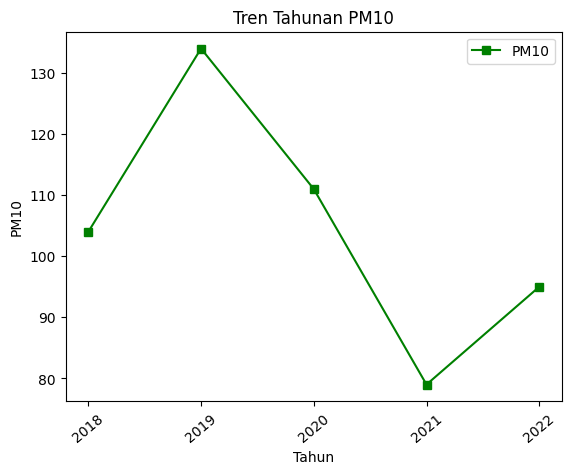

In [31]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap tahun sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi PM10
var = 'PM10'
ispu2.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'green')
plt.ylabel(var)
plt.xticks([2018, 2019, 2020, 2021, 2022], ['2018', '2019', '2020', '2021', '2022'],rotation=40)
plt.xlabel('Tahun')
plt.title('Tren Tahunan ' + var)

Text(0.5, 1.0, 'Tren Tahunan CO')

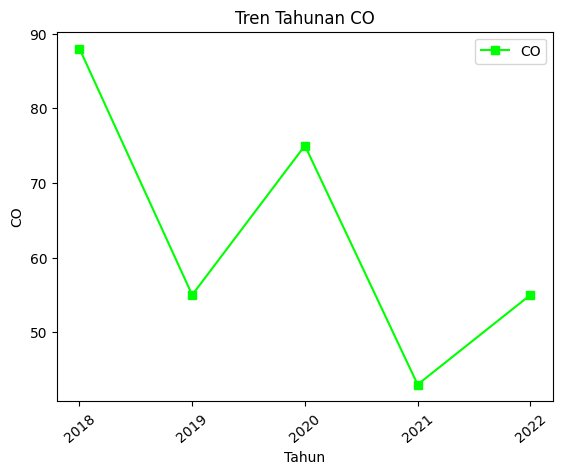

In [32]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap tahun sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi CO
var = 'CO'
ispu2.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'lime')
plt.ylabel(var)
plt.xticks([2018, 2019, 2020, 2021, 2022], ['2018', '2019', '2020', '2021', '2022'],rotation=40)
plt.xlabel('Tahun')
plt.title('Tren Tahunan ' + var)

Text(0.5, 1.0, 'Tren Tahunan SO2')

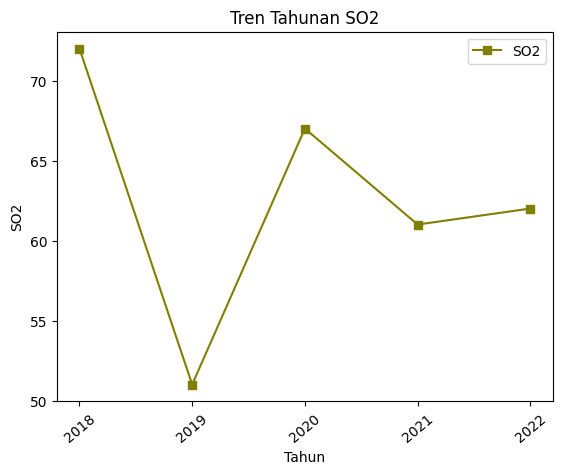

In [33]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap tahun sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi SO2
var = 'SO2'
ispu2.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'olive')
plt.ylabel(var)
plt.xticks([2018, 2019, 2020, 2021, 2022], ['2018', '2019', '2020', '2021', '2022'],rotation=40)
plt.xlabel('Tahun')
plt.title('Tren Tahunan ' + var)

Text(0.5, 1.0, 'Tren Tahunan O3')

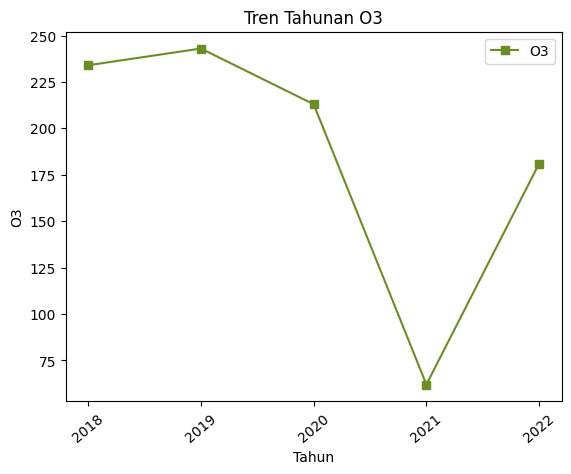

In [34]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap tahun sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi O3
var = 'O3'
ispu2.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'olivedrab')
plt.ylabel(var)
plt.xticks([2018, 2019, 2020, 2021, 2022], ['2018', '2019', '2020', '2021', '2022'],rotation=40)
plt.xlabel('Tahun')
plt.title('Tren Tahunan ' + var)

Text(0.5, 1.0, 'Tren Tahunan NO2')

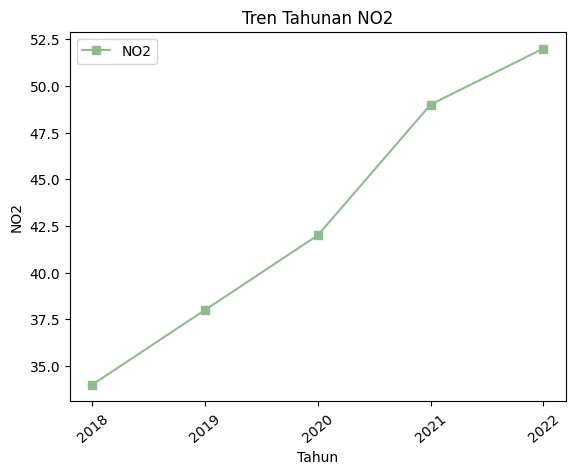

In [35]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap tahun sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi NO2
var = 'NO2'
ispu2.groupby('Tahun')[var].max().plot(marker = 's', legend=True, color = 'darkseagreen')
plt.ylabel(var)
plt.xticks([2018, 2019, 2020, 2021, 2022], ['2018', '2019', '2020', '2021', '2022'],rotation=40)
plt.xlabel('Tahun')
plt.title('Tren Tahunan ' + var)

Text(0.5, 1.0, 'Tren Bulanan PM10')

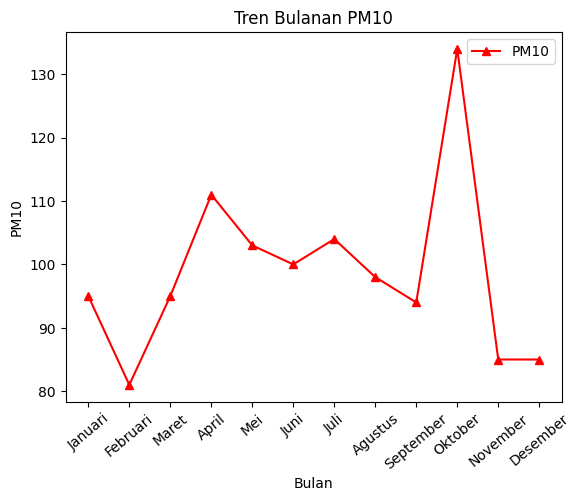

In [36]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap bulan sebagai tren tahunan variable tersebut
#Dimana disini variablenya berisi PM10
var = 'PM10'
ispu2.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'red')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation=40)
plt.xlabel('Bulan')
plt.title('Tren Bulanan ' + var)

Text(0.5, 1.0, 'Tren Bulanan CO')

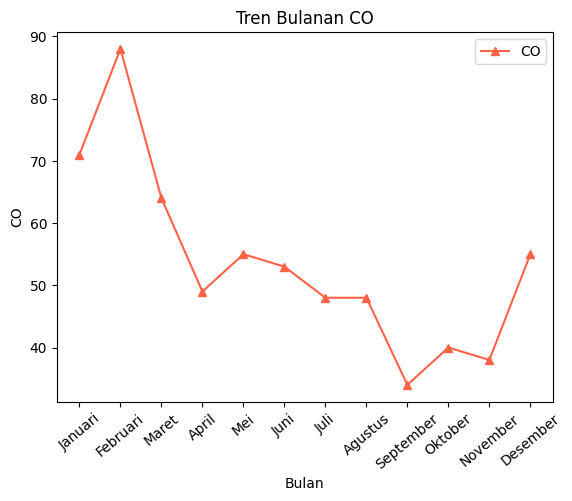

In [37]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap bulan sebagai tren bulanan variable tersebut
#Dimana disini variablenya berisi CO
var = 'CO'
ispu2.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'tomato')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation=40)
plt.xlabel('Bulan')
plt.title('Tren Bulanan ' + var)

Text(0.5, 1.0, 'Tren Bulanan SO2')

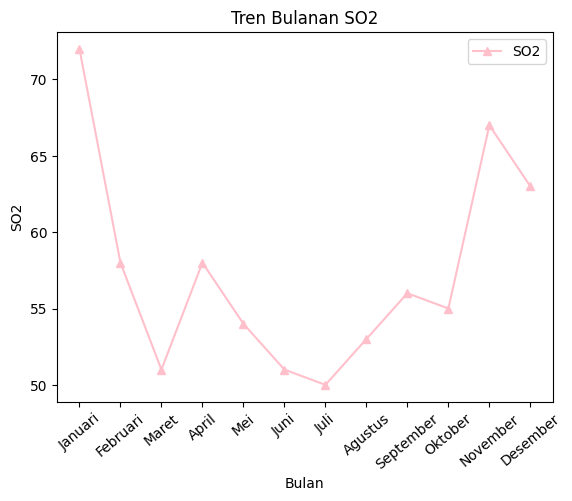

In [38]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap bulan sebagai tren bulanan variable tersebut
#Dimana disini variablenya berisi SO2
var = 'SO2'
ispu2.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'pink')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation=40)
plt.xlabel('Bulan')
plt.title('Tren Bulanan ' + var)

Text(0.5, 1.0, 'Tren Bulanan NO2')

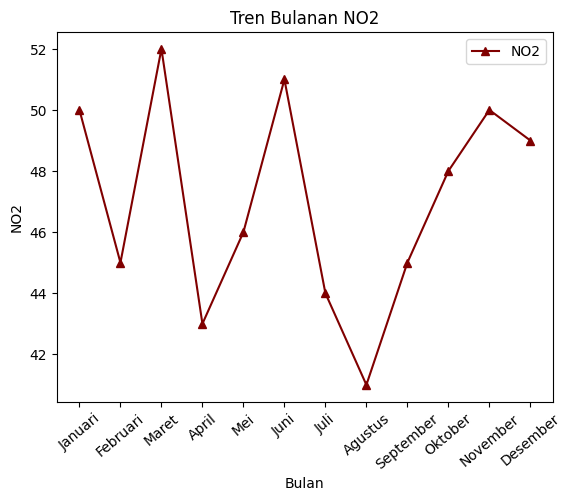

In [39]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap bulan sebagai tren bulanan variable tersebut
#Dimana disini variablenya berisi NO2
var = 'NO2'
ispu2.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'maroon')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation=40)
plt.xlabel('Bulan')
plt.title('Tren Bulanan ' + var)

Text(0.5, 1.0, 'Tren Bulanan O3')

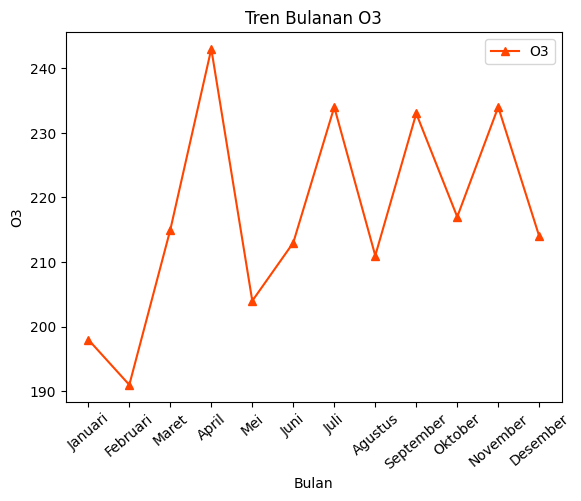

In [40]:
#Menampilkan grafik nilai tertinggi pada variabel yang dimasukkan pada tiap tiap bulan sebagai tren bulanan variable tersebut
#Dimana disini variablenya berisi O3
var = 'O3'
ispu2.groupby('Bulan')[var].max().plot(marker = '^', legend=True, color = 'orangered')
plt.ylabel(var)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],rotation=40)
plt.xlabel('Bulan')
plt.title('Tren Bulanan ' + var)